##### Student information:
- Name: Tuan Anh NGUYEN
- Email: tuan.nguyen@etu.univ-cotedazur.fr

---

# Spotify project

The data this week comes from Spotify via the [`spotifyr` package](https://www.rcharlie.com/spotifyr/). [Charlie Thompson](https://twitter.com/_RCharlie), [Josiah Parry](https://twitter.com/JosiahParry), Donal Phipps, and Tom Wolff authored this package to make it easier to get either your own data or general metadata arounds songs from Spotify's API.

## Data description

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |


## Imports

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

## Data loading

In [215]:
TRAIN = pd.read_csv("spotify_songs_train.csv")
TRAIN.head()
# TRAIN.info()
# print("Shape", TRAIN.shape)
# TRAIN.describe()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,21973,0Xw5Jg9aFglPqfH163thrA,Tell Me,Krept & Konan,40,2p93gdjjBJo51WF4YV3L3d,Tell Me,2019-10-31,Chixtape 5 - Tory Lanez,0UXwwVDipbBQeEX7h4YuKU,...,1,-5.760,0,0.3860,0.1360,0.000,0.0890,0.633,163.563,215047
1,16980,5A1ttHJNuGEoPLhhoHpzFA,Pearls,Epifania,40,0H7yNFgaPSzmji4ts1s3EN,"Gems from Japan, Vol II",2019-07-09,Sunny Beats,37i9dQZF1DXbtuVQL4zoey,...,0,-7.782,0,0.4530,0.3880,0.647,0.0799,0.677,85.054,83294
2,18464,3QHMxEOAGD51PDlbFPHLyJ,Vivir Mi Vida,Marc Anthony,75,6vBpLg3T8bojcqzoKI6m0R,3.0,2013-07-23,Fiesta Latina Mix 🎈🎉💃🏻🕺🏻☀️🏖,2kY6lVc5EcVfI5WNKmPQQG,...,0,-3.230,0,0.0344,0.3440,0.000,0.3490,0.893,105.017,252347
3,2992,48bSfSZaq9Aizbu4AWn4st,Febreze (feat. 2 Chainz),Jack Ü,57,6bfkwBrGYKJFk6Z4QVyjxd,Skrillex and Diplo present Jack Ü,2015-02-24,ELECTROPOP🐹,44p8nNLe4fGfUeArS3MaIX,...,2,-3.510,1,0.3330,0.0184,0.000,0.2890,0.263,149.829,214400
4,16751,2kJIiIqbzYVtv2iTpbQts9,As Far as Feelings Go,Alle Farben,66,7wN2FvcizhjkzuT3MvAGZI,As Far as Feelings Go,2019-10-11,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,...,0,-4.399,0,0.0788,0.1060,0.000,0.1910,0.596,105.948,210827


In [216]:
TEST = pd.read_csv("spotify_songs_X_test.csv")
TEST.head()

,Unnamed: 0,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,3578,0u6CqsKqlArqFuMVKREXp9,Never Can Say Goodbye,The Communards,5JYaoYQ7d8twJ2gp6kPt6C,Red,1987,80's Songs | Top 💯 80s Music Hits,65HtIbyFkaQPflCa4oW8KO,pop,...,5,-6.931,1,0.0287,0.04340,0.027300,0.2860,0.836,132.172,285986
1,26568,5IXV375WDokSNjZfR4GgnU,Love Is The Answer,Aloe Blacc,14JRI2yc9nKosojndoQxTv,Lift Your Spirit,2014-01-01,Soul Coffee (The Best Neo-Soul Mixtape ever),16iNEskDatG5KbDV16F6LR,r&b,...,9,-5.728,0,0.0863,0.03340,0.000000,0.0776,0.816,105.232,224867
2,14306,0sId1fkKRfPlyMMOSVShng,What's on Your Mind (Pure Energy),Information Society,3bv0NUg3BXwT5Uh4PW4zUD,Information Society,1988-06-21,Permanent Wave CHDB,2foj4ZYVHRGqSd1aMqNPBj,rock,...,0,-11.217,1,0.0560,0.00665,0.023800,0.2090,0.753,118.221,275533
3,9452,5BBVTlHaSDBJ0Wc25p9yCB,Рванарана,Litvinenko,2pJdHL7gUQr3uhqWOnZQ1x,Рванарана,2018-07-23,RUSSIAN Gangster Rap,0Jw0HckkxCfIrOvpN081eV,rap,...,6,-5.408,1,0.0558,0.74600,0.000000,0.0606,0.301,79.953,225789
4,25156,7vQNFiycXSGpgGgTxmaWjS,So Lo,Louis Baker,1pDf6t6lK8BQ9C7yhaPCah,So Lo,2019-05-31,I Love My Neo-Soul,37i9dQZF1DX44dZ4p5QLf4,r&b,...,3,-7.025,0,0.0480,0.43400,0.000002,0.1080,0.832,89.008,231640


## Your task

* All the data comes from spotify

* Task 1: Predict ’popularity’ with a Machine Learning model and with a Deep Learning model 
    * 13 points - for Machine Learning model, you can use all model learned in lecture.
    * 13 points - for Deep Learning model, reuse all kind of existing layers.
    * You will be assessed primarily on the quality of the pipeline you have implemented, the quality of your explanations
    * 2 points will be based on the model performance on the test set – metric=MeanSquaredLogarithmicError

* Task 2 : Build a recommender systems with a Machine Learning approach and with a Deep Learning approach.
    * Suggest 5 tracks to listen to based on 5 tracks that a user has liked 
    * 5 points - ML: As we don't have a course dedicated to recommending systems using machine learning models, you'll have to do a bit of research
    * DL: you will be able to draw inspiration from the models we have seen in the deep learning course
    * You will be assessed primarily on the relevance of your approach, based on the justification of your choices

* Submit only 1 zip file, before the end of this year (31.12.2024)
    * With 1 notebook for machine learning
    * With 1 notebook for deep learning
    * 1 csv files with your popularity prediction score. 3 columns: `Unnamed: 0`, ML prediction, DL prediction

---
### 1. Task 1: Predict ’popularity’ with Deep Learning model:
- Stractegic Plan of Action:

    1. *Data Exploration*

    2. *Exploratory Data Analysis (EDA)*
    3. *Feature Selection/Extraction*
    4. *Data Pre-processing*

    5. *Predictive Modelling*
    6. *Task Outcomes & Conclusion*

#### <center> 1.1. Data exploration

- First, I will check if is there any **NA/Missing** value in the dataset.

In [217]:
TRAIN[TRAIN.isnull().any(axis=1)]

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2745,9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
18557,8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
19817,9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
20876,19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
24618,19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


- We can see that the column ***track_name, track_albumn_name, track_artist*** has 5 **NA/Missing** values. Let's see what are these value.

- Luckily, only 5 rows contain the **NA/Missing** values. Here is my strategy with these rows:
    + With numeric columns, I will replace the **NA/Missing** values by the mean values of those columns.
    + With category columns, I will replace the **NA/Missing** values by the least frequent values of those columns.

- Extract the ***target*** and ***train_data*** from the **TRAIN** dataset

In [218]:
# Get the target label
target = TRAIN['track_popularity']

# Get the remain train data
train_data = TRAIN.loc[:, TRAIN.columns != 'track_popularity']

# Drop unnecessary column (Unnamed :0)
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.fillna(np.nan)
train_data.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2271193759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['Unnamed: 0'], axis=1, inplace=True)


(26266, 22)

- Check the data type of each column of the dataset

In [219]:
#Checking the dtypes of all the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26266 non-null  object 
 1   track_name                26261 non-null  object 
 2   track_artist              26261 non-null  object 
 3   track_album_id            26266 non-null  object 
 4   track_album_name          26261 non-null  object 
 5   track_album_release_date  26266 non-null  object 
 6   playlist_name             26266 non-null  object 
 7   playlist_id               26266 non-null  object 
 8   playlist_genre            26266 non-null  object 
 9   playlist_subgenre         26266 non-null  object 
 10  danceability              26266 non-null  float64
 11  energy                    26266 non-null  float64
 12  key                       26266 non-null  int64  
 13  loudness                  26266 non-null  float64
 14  mode  

#### <center> 1.2. Exploratory Data Analysis


- Let me first analyze the distribution of the target variable

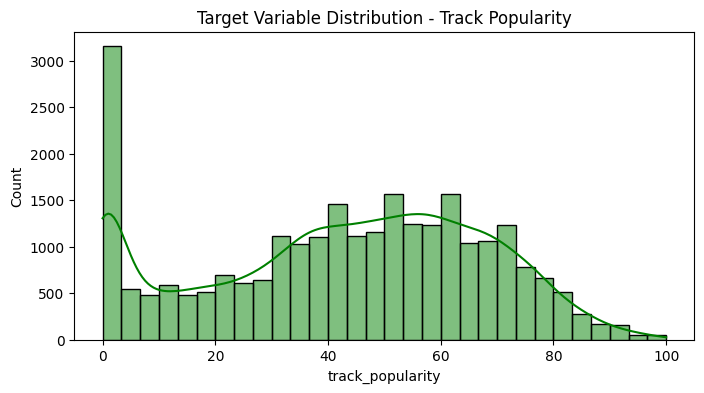

In [220]:
plt.figure(figsize=[8,4])
sns.histplot(target, color='g', bins=30, kde=True)
plt.title('Target Variable Distribution - Track Popularity')
plt.show()

- I will plot the historgram of train data to see the distribution of each continuous feature.

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >]],
      dtype=object)

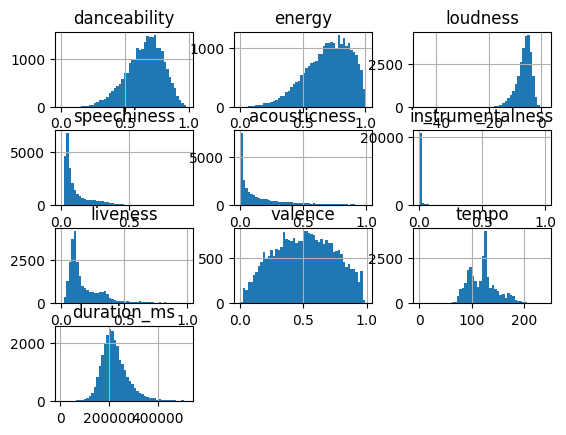

In [221]:
train_data.hist(bins=50, column=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'])

- Some of continuous features are not follow the normal distribution, I will normalize them later 

#### <center> 1.3. Feature Extraction/Selection


##### 1.3.1. Stratgies for each feature of data

Continuous features will be: ***danceability, energy, speechiness, valence, liveness, acousticness, instrumentalness, loudness, tempo, duration_ms***
    + I will use ***PCA*** to reduce the dimension of continuous columns

Now, let's take a look at the categorical features we have: ***mode, playlist_genre, key, playlist_subgenre, playlist_name, playlist_id, track_album_release_date, track_artist, track_album_name, track_album_id, track_name, track_id***
- For example:
    + Some artists may favor specific genres and subgenres of the songs
    + Newer artists often release songs in recent years
    + Specific keys are often associated with certain genres

- So, I will group these features in one group: ***key, playlist_genre, playlist_subgenre, track_artist, track_album_release_date***
- The other features will be treated as other groups: ***(track_name, track_id), (track_album_name, track_album_id), (playlist_name, playlist_id)***

- Inside each group, the features share the same embedding space due to their relevance.

- For each group, I will put it in **Embedding layer**. I will get the ***input_dim*** of **Embedding layer** for each feature:
    + Group 1: *key, playlist_genre, playlist_subgenre, track_artist, track_album_release_date*
    + Group 2 : *track_name, track_id*
    + Group 3 : *track_album_name, track_album_id*
    + Group 4 : *playlist_name, playlist_id*


##### 1.3.2. Custom buil-in transformer

- I will build the ***Categories_Transform*** to transform the categorical columns as the above strategy.

In [222]:

class Category_Transform(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X_cpy = X.copy()
        # X_cpy.replace([None, pd.NA], np.nan)
        # X_cpy.dropna(how='any', axis=0, inplace=True)
        self.drop_cols = []
        self.cate_cols = ['playlist_id', 'track_album_id', 'track_id', 
                          'playlist_genre','key','playlist_subgenre','playlist_name','track_album_release_date',
                        'track_artist','track_album_name','track_name', 'mode']
        self.encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=-1, dtype=int)
        self.encoder.fit(X_cpy[self.cate_cols])
        return self
    
    def transform(self, X):
        X_cpy = X.copy()
        # Fill NA/NaN with 'Unknown' value
        X_cpy.fillna('Unknown')            
        # Transform the data
        X_cpy[self.cate_cols] = self.encoder.transform(X_cpy[self.cate_cols])
        # Replace unknow value, which is -1 by maximum value of each column + 1
        for col in self.cate_cols:
            replace_value = X_cpy[col].max() + 1
            X_cpy.loc[X_cpy[col] == -1, col] = replace_value
            X_cpy[col] = X_cpy[col].astype('int32')
        # Drop columns
        X_cpy = X_cpy.drop(self.drop_cols, axis=1)

        return X_cpy[self.cate_cols]

Now, I will make the pipeline for continuous features and categorical features:


- Numerical pipeline

In [223]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver="auto")),
])

- Categorical pipeline

In [224]:
cat_pipeline = Pipeline(steps=[
    ('category_transform', Category_Transform())
])

In [225]:
# Numeric values
num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Category values
cat_cols = ['key', 'playlist_genre', 'playlist_subgenre', 'track_id','track_artist', 'track_name', 
             'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date','mode']

#### <center> 1.4. Data Pre-processing


- In order to get the best model, I will split the **TRAIN** dataset into train set ***(x_Train, y_Train)*** and test set ***(x_Test, y_Test)***

In [226]:
x_Train, x_Test, y_Train, y_Test = train_test_split(train_data, target, train_size=0.8, test_size=0.2, random_state=100)
x_Train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',train_data.shape,target.shape,'\nTraining set  ---> ',x_Train.shape,y_Train.shape,'\nTesting set   ---> ', x_Test.shape,'', y_Test.shape)

Original set  --->  (26266, 22) (26266,) 
Training set  --->  (21012, 22) (21012,) 
Testing set   --->  (5254, 22)  (5254,)


In [227]:
x_Train_cate = cat_pipeline.fit_transform(x_Train[cat_cols])
x_Train_num = num_pipeline.fit_transform(x_Train[num_cols])

x_Test_cate = cat_pipeline.transform(x_Test[cat_cols])
x_Test_num = num_pipeline.transform(x_Test[num_cols])

In [228]:
group1_features = ['key', 'playlist_genre', 'playlist_subgenre', 'track_artist', 'track_album_release_date','mode']
group2_features = ['track_name', 'track_id']
group3_features = ['track_album_id', 'track_album_name']
group4_features = ['playlist_name', 'playlist_id']
features = [group1_features, group2_features, group3_features, group4_features]

# Because we have to handle the unseen value, we should +2 instead of +1
dims = [max([(max(x_Train_cate[col]) + 2) for col in group]) for group in features]
dims

[8193, 18984, 15894, 472]

#### <center> 1.5. Predictive Modelling


- For this problem which is predicting the continuous value: ***track_popularity***, I will use:
    - *Multi-Layer Perceptron - MLP*
    - *Convolution Neuron Network - CNN*

##### 1.5.1. Multi-Layer Perceptron 

![Multi-Layer Perceptron Architecture](./img/mlp.png)

Source: Own

In [229]:

def MyMLP(hp: kt.HyperParameters):
    # Numerical Input
    num_input = keras.layers.Input(shape=(x_Train_num.shape[1],))
    x_num = keras.layers.Flatten()(num_input)

    
    # Categorical inputs
    x_cates = []
    cate_inputs = []
    for i, feature in enumerate(features):
        inp = keras.layers.Input(shape=(len(feature),))
        
        embed = keras.layers.Embedding(input_dim=dims[i], 
                                        output_dim=hp.Int(f'dim_embedding_group{i}_features', min_value=8, max_value=64, step=16), 
                                        name=f'group{i}_features_embed')(inp)
        embed = keras.layers.Flatten()(embed)
            
        x_group = keras.layers.Dense(hp.Int(f'group{i}_dense', min_value=8, max_value=64, step=16), 
                                            activation='relu')(embed)
        x_group = keras.layers.Dropout(0.2)(x_group)
        x_cates.append(x_group)
        cate_inputs.append(inp)
    
    # Concatenation
    x_MLP = keras.layers.Concatenate(axis=1)([x_num] + x_cates)
    
    # Fully connected layers
    x_MLP = keras.layers.Dense(units = hp.Int('dim_MLP_1', min_value=128, max_value=256, step=16), activation='relu')(x_MLP)
    x_MLP = keras.layers.Dense(units = hp.Int('dim_MLP_2', min_value=64, max_value=128, step=16), activation='relu')(x_MLP)
    x_MLP = keras.layers.Dense(units = hp.Int('dim_MLP_3', min_value=16, max_value=64, step=16), activation='relu')(x_MLP)
    outputs = keras.layers.Dense(units = 1, activation='linear')(x_MLP)
    
    # Build the model
    model = keras.models.Model(inputs=[num_input] + cate_inputs, outputs=outputs)
    
    # compile the model
    model.compile(optimizer='adam', loss='msle', metrics=['msle'])
    
    # summarize the model
    print(model.summary())
    
    return model
    

In [236]:
# simple early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)
mc = keras.callbacks.ModelCheckpoint("best-model-mlp.weights.h5", monitor="val_loss", save_best_only=True, save_weights_only=True)

# Random Search the hyperparameters
tuner_MLP = kt.GridSearch(
    hypermodel= MyMLP,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="MLP",
)

tuner_MLP.search([np.array(x_Train_num), 
              np.array(x_Train_cate[group1_features]), np.array(x_Train_cate[group2_features]),
              np.array(x_Train_cate[group3_features]), np.array(x_Train_cate[group4_features])], 
             np.array(y_Train).reshape(-1),
                    validation_split=0.2, epochs=30, verbose=1, callbacks=[es,mc])

Trial 10 Complete [00h 00m 46s]
val_loss: 1.0176870226860046

Best val_loss So Far: 0.9699544012546539
Total elapsed time: 00h 07m 25s


In [246]:
best_model_MLP = tuner_MLP.get_best_models()[0]
loss_MLP, msle_MLP = best_model_MLP.evaluate([np.array(x_Test_num), 
              np.array(x_Test_cate[group1_features]), np.array(x_Test_cate[group2_features]),
              np.array(x_Test_cate[group3_features]), np.array(x_Test_cate[group4_features])], np.array(y_Test).reshape(-1))


print(f"Mean Square Logarithmic Error for MLP: {msle_MLP:.2f}" )

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group0_features_em… │ (None, 6, 8)      │     65,544 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group1_features_em… │ (None, 2, 8)      │    151,872 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group2_features_em… │ (None, 2, 8)      │    127,152 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group3_features_em… │ (None, 2, 8)      │      3,776 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 48)        │          0 │ group0_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 16)        │          0 │ group1_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 16)        │          0 │ group2_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 16)        │          0 │ group3_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │        392 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8)         │        136 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │        136 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 8)         │        136 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 9)         │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 8)         │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 8)         │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 367,465 (1.40 MB)

 Trainable params: 367,465 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

None


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_2', 'keras_tensor_7', 'keras_tensor_12', 'keras_tensor_17']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9078 - msle: 0.9078
Mean Square Logarithmic Error for MLP: 0.92


##### 1.5.2. Convolution Neural Network - CNN

![Convolution Neural Network Architecture](./img/cnn.png)

Source: Own

In [233]:

def MyCNN(hp: kt.HyperParameters):
    
    ## <------- For numerical inputs ------>
    
    # Numerical Input
    num_input = keras.layers.Input(shape=(x_Train_num.shape[1],))
    x_num = keras.layers.Flatten()(num_input)
    
    x_num = keras.layers.Reshape((x_Train_num.shape[1], 1))(x_num)
    
    # Convolution for numerical data
    x_num = keras.layers.Conv1D(filters=hp.Int('dim_Conv_num_bin_1', min_value=8, max_value=64, step=16), 
                                    kernel_size=3, strides=2, activation='relu', padding='same')(x_num)
    x_num = keras.layers.Conv1D(filters=hp.Int('dim_Conv_num_bin_2', min_value=64, max_value=128, step=16), 
                                    kernel_size=3, strides=2, activation='relu', padding='same')(x_num)
    x_num = keras.layers.Conv1D(filters=hp.Int('dim_Conv_num_bin_2', min_value=128, max_value=256, step=16), 
                                    kernel_size=3, strides=1, activation='relu', padding='valid')(x_num)
    x_num = keras.layers.Dropout(0.2)(x_num)
    x_num = keras.layers.Flatten()(x_num)
    
    
    ## <------- For categorical inputs ------>
    
    # output dimension of embedding layers
    output_embed_dim = hp.Int('embedding_dim', min_value=8, max_value=64, step=16)
    
    # Group2,3,4 inputs
    x_group_234 = []
    group_234_input = []
    for i, feature in enumerate(features):
        if i != 0:
            inp = keras.layers.Input(shape=(len(feature),))
            embed = keras.layers.Embedding(input_dim=dims[i], 
                                        output_dim=output_embed_dim, 
                                        name=f'group{i+1}_embed')(inp)
            # embed = keras.layers.Flatten()(embed)
            group_234_input.append(inp)
            # # Convolution layer for group 2, 3, 4
            embed = keras.layers.Conv1D(filters=hp.Int(f'dim_Conv_group{i+1}_1', min_value=32, max_value=64, step=16), 
                                            kernel_size=2, strides=1, activation='relu', padding='same')(embed)
            embed = keras.layers.Conv1D(filters=hp.Int(f'dim_Conv_group{i+1}_2', min_value=64, max_value=256, step=32), 
                                            kernel_size=2, strides=1, activation='relu', padding='valid')(embed)
            embed =  keras.layers.Dropout(0.2)(embed)
            embed = keras.layers.Flatten()(embed)
            x_group_234.append(embed)              # Put the conv1d output of each group of features in the list
    
    # Group1 inputs
    group1_inputs = keras.layers.Input(shape=(len(group1_features),))
    
    embed = keras.layers.Embedding(input_dim=dims[0], 
                                       output_dim=hp.Int(f'dim_embedding_group1_features', min_value=8, max_value=64, step=16), 
                                       name='group1_features_embed')(group1_inputs)
    
    # Convolution layer for group1
    x_group_1 = keras.layers.Conv1D(filters=hp.Int('dim_Conv_group1_1', min_value=8, max_value=64, step=16), 
                                    kernel_size=3, strides=2, activation='relu', padding='same')(embed)
    x_group_1 = keras.layers.Conv1D(filters=hp.Int('dim_Conv_group1_2', min_value=64, max_value=128, step=16), 
                                    kernel_size=3, strides=2, activation='relu', padding='same')(x_group_1)
    x_group_1 = keras.layers.Conv1D(filters=hp.Int('dim_Conv_group1_3', min_value=128, max_value=256, step=16), 
                                    kernel_size=3, strides=2, activation='relu', padding='same')(x_group_1)
    x_group_1 = keras.layers.Dropout(0.2)(x_group_1)
    x_group_1 = keras.layers.Flatten()(x_group_1)
    
    
    ## <---- Fully connection ----->
    
    # Concatenation for numerical, binary and categorical input after convolution layers
    x = keras.layers.Concatenate(axis=1)([x_num, x_group_1] + x_group_234)
    
    # Fully connected layers
    outputs = keras.layers.Dense(units = 1, activation='linear')(x)
    
    # Build the model
    model = keras.models.Model(inputs=[num_input, group1_inputs] + group_234_input, outputs=outputs)
    
    # compile the model
    model.compile(optimizer='adam', loss='msle', metrics=['msle'])
    
    # summarize the model
    print(model.summary())
    
    return model
    

In [238]:
# simple early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)
mc = keras.callbacks.ModelCheckpoint("best-model-cnn.weights.h5", monitor="val_loss", save_best_only=True, save_weights_only=True)

# Random Search the hyperparameters
tuner_CNN = kt.GridSearch(
    hypermodel= MyCNN,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="CNN",
)


tuner_CNN.search([np.array(x_Train_num), 
              np.array(x_Train_cate[group1_features]), np.array(x_Train_cate[group2_features]),
              np.array(x_Train_cate[group3_features]), np.array(x_Train_cate[group4_features])], 
             np.array(y_Train).reshape(-1),
                    validation_split=0.2, epochs=30, verbose=1, callbacks=[es,mc])

Trial 10 Complete [00h 00m 58s]
val_loss: 1.065916895866394

Best val_loss So Far: 1.0489855408668518
Total elapsed time: 00h 09m 36s


In [245]:
best_model_CNN = tuner_CNN.get_best_models()[0]
loss_CNN, msle_CNN = best_model_CNN.evaluate([np.array(x_Test_num), 
              np.array(x_Test_cate[group1_features]), np.array(x_Test_cate[group2_features]),
              np.array(x_Test_cate[group3_features]), np.array(x_Test_cate[group4_features])], np.array(y_Test).reshape(-1))

print(f"Mean Square Logarithmic Error for CNN: {msle_CNN:.2f}" )

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 9)         │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 9, 1)      │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group1_features_em… │ (None, 6, 8)      │     65,544 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 5, 8)      │         32 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 3, 8)      │        200 │ group1_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group2_embed        │ (None, 2, 8)      │    151,872 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group3_embed        │ (None, 2, 8)      │    127,152 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group4_embed        │ (None, 2, 8)      │      3,776 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 3, 64)     │      1,600 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 2, 64)     │      1,600 │ conv1d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 2, 32)     │        544 │ group2_embed[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 2, 32)     │        544 │ group3_embed[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 2, 32)     │        544 │ group4_embed[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1, 64)     │     12,352 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 1, 128)    │     24,704 │ conv1d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 403,329 (1.54 MB)

 Trainable params: 403,329 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

None


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_26', 'keras_tensor_8', 'keras_tensor_14', 'keras_tensor_20']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9402 - msle: 0.9402
Mean Square Logarithmic Error for CNN: 0.97


##### 1.5.3. Predict the track_popularity for TEST data

- I will take the result of best model, which is the ***MLP*** model (loss = $0.92$).

In [240]:
unnamed_col = TEST['Unnamed: 0']
test_data = TEST.drop(['Unnamed: 0'],axis=1)
test_data.fillna(np.nan)
print("Shape of test data: ", test_data.shape)

# Transform the test data
X_Test_cate = cat_pipeline.transform(test_data[cat_cols])
X_Test_num = num_pipeline.transform(test_data[num_cols])

y_pred = best_model_MLP.predict([np.array(X_Test_num), 
              np.array(X_Test_cate[group1_features]), np.array(X_Test_cate[group2_features]),
              np.array(X_Test_cate[group3_features]), np.array(X_Test_cate[group4_features])])

Shape of test data:  (6567, 22)
 22/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_2', 'keras_tensor_7', 'keras_tensor_12', 'keras_tensor_17']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


- Export to CSV file

In [241]:
df_ML = pd.read_csv("prediction.csv")
df_DL = pd.DataFrame({
    'Unnamed:0': unnamed_col,
    'y_pred_ML': df_ML['y_pred_ML'],
    'y_pred_DL' : list(y_pred.reshape(-1))
})
df_DL.set_index(df_DL.columns[0], inplace=True)
df_DL.index.name = None
df_DL.to_csv('prediction.csv', index=True)

#### <center> 1.6. Task Outcomes & Conclusion


- The use of the ***Embedding layer*** allows the models to effectively extract all relevant features, leading to improved performance.
- With the ***Embedding layer***, the latent space is able to capture and illustrate the hidden relationships between features.
- Given that the data is inherently independent, the use of ***RNNs*** is not well-suited for this problem.

---
### 2. Task 2: Recommender Systems:
- Stractegic Plan of Action:
    1. *Pre-processing data*
    2. *Deep and Wide architecture (Google)*
    3. *Conclusion*

#### <center> 2.1. Pre-processing data


- Now, I will choose 100 songs from the data, assume that user has favorite artists: ***'Ed Sheeran', 'Bruno Mars', 'Justin Bieber, Maroon 5'***. From that information, I will get randomly 100 songs which have those features from the dataset.

- I will add column named ***liked*** to indicate that user likes or not ($1$ means like and $0$ means not like or not interact)

In [175]:
favor_songs = TRAIN[TRAIN['track_artist'].isin(['Ed Sheeran', 'Bruno Mars', 'Justin Bieber','Maroon 5'])]
favor_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
favor_songs.drop_duplicates(inplace=True)
favor_songs['liked'] = 1
sample_favor_df = favor_songs.sample(n=100, random_state=3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\3005541302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favor_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\3005541302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favor_songs.drop_duplicates(inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\3005541302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

- Now, I will take 5 samples of this data to be the songs that a user has liked.

In [176]:
like_songs = sample_favor_df.head()
like_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
10653,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,91,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,-6.376,0,0.0824,0.1480,0.000000,0.0865,0.668,97.986,204467,1
22455,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,86,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),2017-03-03,School Dance 2019 (Squeaky Clean),0SqaMfNsngZCpPw0UuelA7,latin,...,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,263400,1
783,5UJshy5HDHdNEVqlJwzsQB,Versace On The Floor (Bruno Mars vs. David Gue...,Bruno Mars,63,0yDiMZdbFwO5lGB9Dq5wlL,Versace On The Floor (Bruno Mars vs. David Gue...,2017-06-27,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,-4.902,1,0.0429,0.1080,0.000000,0.0712,0.589,100.012,228300,1
535,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,16,1Jmq5HEJeA9kNi2SgQul4U,Red Pill Blues (Deluxe),2017-11-03,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,-5.211,0,0.0671,0.0786,0.000003,0.0855,0.393,110.009,199849,1
7257,7ieV1TBSMyf5sFiPh9X2ai,Misery - Acoustic Version,Maroon 5,51,3gjJTUMI9q6ReSe0z7gyjp,Hands All Over (Revised International Deluxe),2010,Unplugged Hits 📣,5NTm3injIRkUMROsZr3C2O,latin,...,-7.544,1,0.0385,0.2400,0.000000,0.1110,0.420,97.002,226320,1


- Now, I will choose 20 samples of dataset of not liked or not interact songs and mix them with the liked songs. So the ratio between class $0$ and $1$ is $4:1$

In [177]:
not_favor = TRAIN[~TRAIN['track_artist'].isin(['Ed Sheeran', 'Bruno Mars', 'Justin Bieber','Maroon 5'])]
not_favor.drop(['Unnamed: 0'], axis=1, inplace=True)
not_favor.drop_duplicates(inplace=True)
not_favor['liked'] = 0
sample_not_favor_df = not_favor.head(20)

# Concatenate the two DataFrames
combined_df = pd.concat([like_songs, sample_not_favor_df])
# Shuffle the rows
final_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2599674242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_favor.drop(['Unnamed: 0'], axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2599674242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_favor.drop_duplicates(inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\2599674242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

- Extract ***x_Train*** and ***y_Train*** from the combination: ***final_df***

In [178]:
# Numeric values
num_cols_resys = ['danceability', 'energy', 'track_popularity', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Category values
cat_cols_resys = ['key', 'playlist_genre', 'playlist_subgenre', 'track_id','track_artist', 'track_name', 
             'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date', 'mode']


In [179]:
x_Train_resys = final_df.drop(['liked'], axis=1)
y_Train_resys = final_df['liked']

In [180]:
x_Train_resys_cate = cat_pipeline.fit_transform(x_Train_resys[cat_cols_resys])
x_Train_resys_num = num_pipeline.fit_transform(x_Train_resys[num_cols_resys])

#### <center> 2.2. Deep and Wide architecture (Google)


- Here, I will build the ***Recommender System*** based on ***Deep and Wide architecture***

![Deep and Wide architecture (Google)](./img/deep_wide_arch.png)

Source: 04-slides_RS_recommender_systems2.pdf (Université Côte d'Azur)

In [190]:

def MyReSys(hp: kt.HyperParameters):
    
    # Continuous features
    continous_inputs = keras.layers.Input(shape=(x_Train_resys_num.shape[1],))
    continuos_x = keras.layers.Dense(128, activation='relu')(continous_inputs)
    continuos_x = keras.layers.Dense(128, activation='relu')(continuos_x)
    continuos_x = keras.layers.Dropout(0.1)(continuos_x)
    continuos_x = keras.layers.Dense(1, activation='linear')(continuos_x)

    
    # Categorical features
    inner_products = []
    categorical_inputs = []
    for i, feature in enumerate(features):
        inp = keras.layers.Input(shape=(len(feature),))
        embed_dim = hp.Int(f'dim_embedding_group{i}_features', min_value=16, max_value=64, step=16)
        embed = keras.layers.Embedding(input_dim=dims[i], 
                                        output_dim=embed_dim, 
                                        name=f'group{i}_features_embed')(inp)
        embed = keras.layers.Flatten()(embed)
        
        x = keras.layers.RepeatVector(len(feature)*embed_dim)(continuos_x)
        x = keras.layers.Reshape((len(feature)*embed_dim,))(x)
        dot_product = keras.layers.Dot(axes=-1)([x, embed])
        
        inner_products.append(dot_product)
        categorical_inputs.append(inp)
    
    
    # Concatenation
    x_concate = keras.layers.Concatenate(axis=1)([continuos_x] + inner_products)
    
    # Fully connected layers
    x_concate = keras.layers.Dense(units = hp.Int('dim_hidden_1', min_value=128, max_value=256, step=16), activation='relu')(x_concate)
    x_concate = keras.layers.Dense(units = hp.Int('dim_hidden_2', min_value=128, max_value=256, step=16), activation='relu')(x_concate)
    outputs = keras.layers.Dense(units = 1, activation='sigmoid')(x_concate)
    
    # Build the model
    model = keras.models.Model(inputs=[continous_inputs] + categorical_inputs, outputs=outputs)
    
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['f1_score'])
    
    # summarize the model
    print(model.summary())
    
    return model
    

- I added 5 liked songs and 20 not liked or not interacted songs together to be train data, so the classes are imbalance. I will use ***class_weight*** to train the data.

In [182]:
# As the dataset is not balanced, errors are weighted by class
from sklearn.utils import class_weight

cls_w = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_Train_resys),
                                                 y=y_Train_resys.ravel())

cls_w = {k:v for k, v in enumerate(cls_w)}
cls_w

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\734866994.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=y_Train_resys.ravel())


{0: 0.625, 1: 2.5}

In [203]:
# simple early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)
mc = keras.callbacks.ModelCheckpoint("best-model2.weights.h5", monitor="val_loss", save_best_only=True, save_weights_only=True)

# Random Search the hyperparameters
tuner_MyReSys = kt.GridSearch(
    hypermodel= MyReSys,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="ReSys",
)


tuner_MyReSys.search([np.array(x_Train_resys_num), 
              np.array(x_Train_resys_cate[group1_features]), np.array(x_Train_resys_cate[group2_features]),
              np.array(x_Train_resys_cate[group3_features]), np.array(x_Train_resys_cate[group4_features])], 
             np.array(y_Train_resys).reshape(-1,1),
                    validation_split=0.2, epochs=100, verbose=1, callbacks=[es,mc], class_weight=cls_w,)

Trial 20 Complete [00h 00m 11s]
val_loss: 0.7186219394207001

Best val_loss So Far: 0.18881802260875702
Total elapsed time: 00h 07m 16s


In [207]:
test_sample = pd.concat([favor_songs.iloc[5:], not_favor.iloc[20:]], axis=0, ignore_index=True)
# Shuffle the rows
test_df = test_sample.sample(frac=1, random_state=42).reset_index(drop=True)
x_Test_resys = test_df.drop(['liked'], axis=1)
y_Test_resys = test_df['liked']
x_Test_resys_cate = cat_pipeline.transform(x_Test_resys[cat_cols_resys])
x_Test_resys_num = num_pipeline.transform(x_Test_resys[num_cols_resys])

In [208]:
best_model_MyReSys = tuner_MyReSys.get_best_models()[0]
y_pred_MyReSys = best_model_MyReSys.predict([np.array(x_Test_resys_num), 
              np.array(x_Test_resys_cate[group1_features]), np.array(x_Test_resys_cate[group2_features]),
              np.array(x_Test_resys_cate[group3_features]), np.array(x_Test_resys_cate[group4_features])])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      1,152 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 96, 1)     │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group0_features_em… │ (None, 6, 16)     │    131,088 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 32, 1)     │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group1_features_em… │ (None, 2, 16)     │    303,744 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 32, 1)     │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group2_features_em… │ (None, 2, 16)     │    254,304 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_3     │ (None, 32, 1)     │          0 │ dense_2[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ group3_features_em… │ (None, 2, 16)     │      7,552 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 96)        │          0 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 740,210 (2.82 MB)

 Trainable params: 740,210 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

None


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_5', 'keras_tensor_11', 'keras_tensor_17', 'keras_tensor_23']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [211]:
top_five = np.argsort(np.array(y_pred_MyReSys).reshape(-1))[-5:][::-1]
top_songs = x_Test_resys.iloc[top_five]
top_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9949,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,86,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),2017-03-03,School Dance 2019 (Squeaky Clean),0SqaMfNsngZCpPw0UuelA7,latin,...,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,263400
19341,3SZqA7rQvROJsCbUu2v0xa,Go Loko,YG,78,1GZ1ugREGYIdS5isG2PIFD,Go Loko,2019-05-03,Chixtape 5 - Tory Lanez,0UXwwVDipbBQeEX7h4YuKU,r&b,...,2,-5.188,1,0.0429,0.2990,0.000005,0.0677,0.142,100.995,299227
15412,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,91,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,9,-6.376,0,0.0824,0.1480,0.000000,0.0865,0.668,97.986,204467
22205,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,91,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,9,-6.376,0,0.0824,0.1480,0.000000,0.0865,0.668,97.986,204467
23851,3HW030T8eqPs8wpsgZqCGM,Q.U.E.E.N.,Janelle Monáe,54,3bnHtSmmsgJiG82hGCmsq9,The Electric Lady,2013-09-06,This Is Janelle Monáe,37i9dQZF1DWVT93EW7kPT9,pop,...,0,-8.139,1,0.0676,0.0114,0.000008,0.1230,0.161,106.028,310480


In [213]:
top_songs[top_songs['track_id']=='4vUmTMuQqjdnvlZmAH61Qk']['playlist_subgenre']

15412      pop edm
22205    latin pop
Name: playlist_subgenre, dtype: object

- After a few trials, this is the best model that I could build: 
    - As you can see, 3 of suggestions has the favorist artists name: ***Ed Sheeran***
    - All of the genre are the same as that user has liked: ***edm, latin, pop***
    - There are 2 songs has the same name as that user liked: one of them belongs to another ***playlist_name*** and the other has different ***playlist_subgenre***

#### <center> 2.3. Conclusion


- Clearly, the Deep Learning Recommender System outperforms the Machine Learning Recommender System, as it can effectively extract all features from the data, especially when dealing with large amounts of data and intricate relationships between features.
- Additionally, it can uncover and explain the relationships between features, with the latent space revealing the hidden characteristics of each song, it can help explain how items (like songs) relate to one another.